# Student test performance

### 1. Importing the data and libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) # makes pandas show all the columns of the dataframe instead of ...
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("../data/StudentsPerformance.csv")

### 2. Understanding the data

In [3]:
df.shape

(1000, 8)

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

In [7]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [8]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [9]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [10]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [11]:
# creating a new column called total score which is the sum of all the tests scores
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]


In [12]:
# creating a new column called final score which is the sum of all the test scores then divided by the number of tests
df["final score"] = df["total score"] / 3

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,final score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
# replacing the data of the columns that contain only 2 unique values to a binary format
df["gender"] = df["gender"].replace("female", 0)
df["gender"] = df["gender"].replace("male", 1)
df["lunch"] = df["lunch"].replace("free/reduced", 0)
df["lunch"] = df["lunch"].replace("standard", 1)
df["test preparation course"] = df["test preparation course"].replace("none", 0)
df["test preparation course"] = df["test preparation course"].replace("completed", 1)

le = preprocessing.LabelEncoder()
df["race/ethnicity"] = le.fit_transform(df["race/ethnicity"])
df["parental level of education"] = le.fit_transform(df["parental level of education"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race/ethnicity               1000 non-null   int32  
 2   parental level of education  1000 non-null   int32  
 3   lunch                        1000 non-null   int64  
 4   test preparation course      1000 non-null   int64  
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total score                  1000 non-null   int64  
 9   final score                  1000 non-null   float64
dtypes: float64(1), int32(2), int64(7)
memory usage: 70.4 KB


In [16]:
df.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,final score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,2.174000,2.486000,0.645000,0.358000,66.08900,69.169000,68.054000,203.312000,67.770667
std,0.499926,1.157179,1.829522,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,9.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,58.333333
50%,0.000000,2.000000,2.000000,1.000000,0.000000,66.00000,70.000000,69.000000,205.000000,68.333333
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,77.666667
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,100.000000


In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,final score
0,0,1,1,1,0,72,72,74,218,72.666667
1,0,2,4,1,1,69,90,88,247,82.333333
2,0,1,3,1,0,90,95,93,278,92.666667
3,1,0,0,0,0,47,57,44,148,49.333333
4,1,2,4,1,0,76,78,75,229,76.333333


histogram plot

array([[<AxesSubplot: title={'center': 'gender'}>,
        <AxesSubplot: title={'center': 'race/ethnicity'}>,
        <AxesSubplot: title={'center': 'parental level of education'}>],
       [<AxesSubplot: title={'center': 'lunch'}>,
        <AxesSubplot: title={'center': 'test preparation course'}>,
        <AxesSubplot: title={'center': 'math score'}>],
       [<AxesSubplot: title={'center': 'reading score'}>,
        <AxesSubplot: title={'center': 'writing score'}>,
        <AxesSubplot: title={'center': 'total score'}>],
       [<AxesSubplot: title={'center': 'final score'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

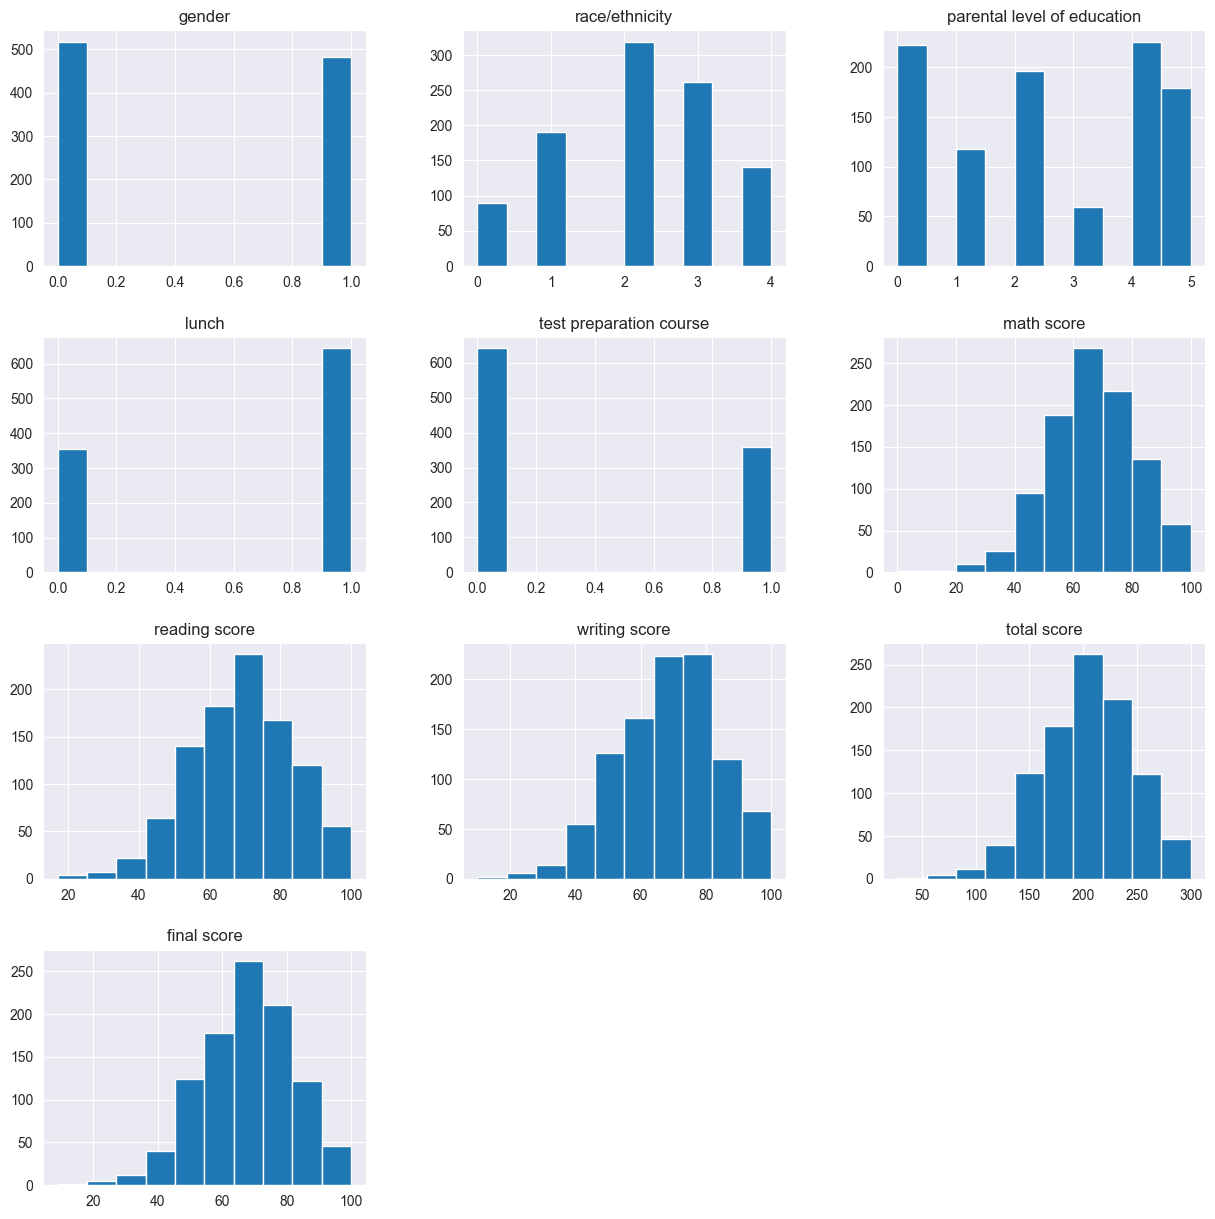

In [18]:
df.hist(figsize=(15, 15))

finding the covariance

In [19]:
df.cov()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,final score
gender,0.249926,-0.000869,0.001750,0.005115,0.001445,1.273375,-1.783241,-2.288316,-2.798182,-0.932727
race/ethnicity,-0.000869,1.339063,-0.067632,0.025796,0.009718,3.797311,2.454048,2.913518,9.164877,3.054959
parental level of education,0.001750,-0.067632,3.347151,0.005536,0.021033,-1.894148,-1.935069,-2.343588,-6.172805,-2.057602
lunch,0.005115,0.025796,0.005536,0.229204,-0.003914,2.547142,1.604600,1.787958,5.939700,1.979900
test preparation course,0.001445,0.009718,0.021033,-0.003914,0.230066,1.292430,1.693191,2.280949,5.266571,1.755524
math score,1.273375,3.797311,-1.894148,2.547142,1.292430,229.918998,180.998958,184.939133,595.857089,198.619030
reading score,-1.783241,2.454048,-1.935069,1.604600,1.693191,180.998958,213.165605,211.786661,605.951223,201.983741
writing score,-2.288316,2.913518,-2.343588,1.787958,2.280949,184.939133,211.786661,230.907992,627.633786,209.211262
total score,-2.798182,9.164877,-6.172805,5.939700,5.266571,595.857089,605.951223,627.633786,1829.442098,609.814033
final score,-0.932727,3.054959,-2.057602,1.979900,1.755524,198.619030,201.983741,209.211262,609.814033,203.271344


finding the correlation

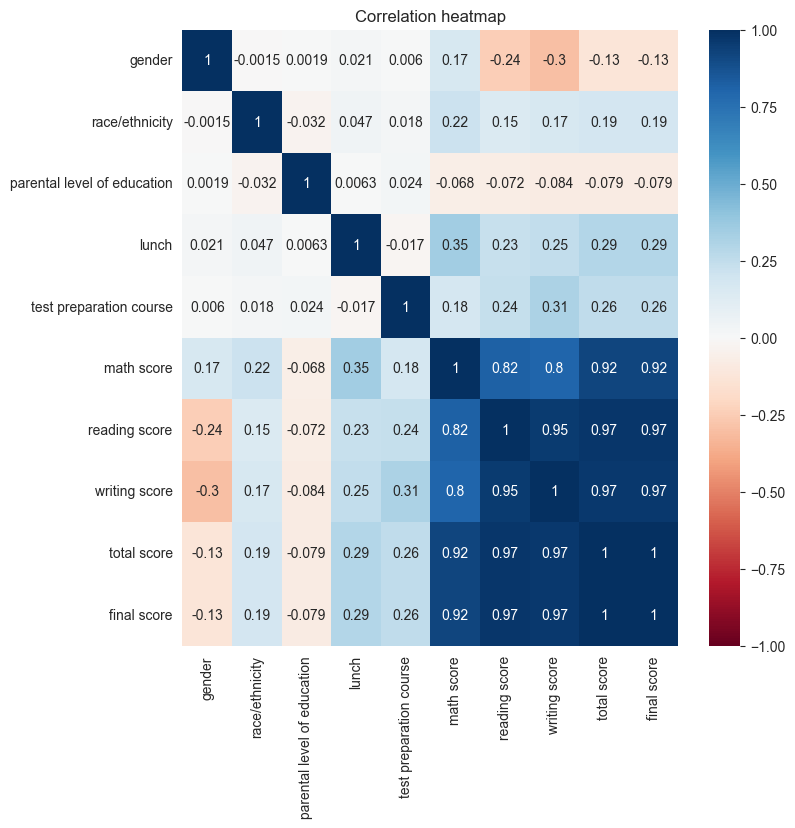

In [20]:
corr = df.corr()
plt.figure(figsize=(8,8))
plt.title("Correlation heatmap")
sns.heatmap(corr, cmap="RdBu", vmin= -1, vmax= 1, annot=True)
plt.show()

visualizing relationship between reading, writing and math scores

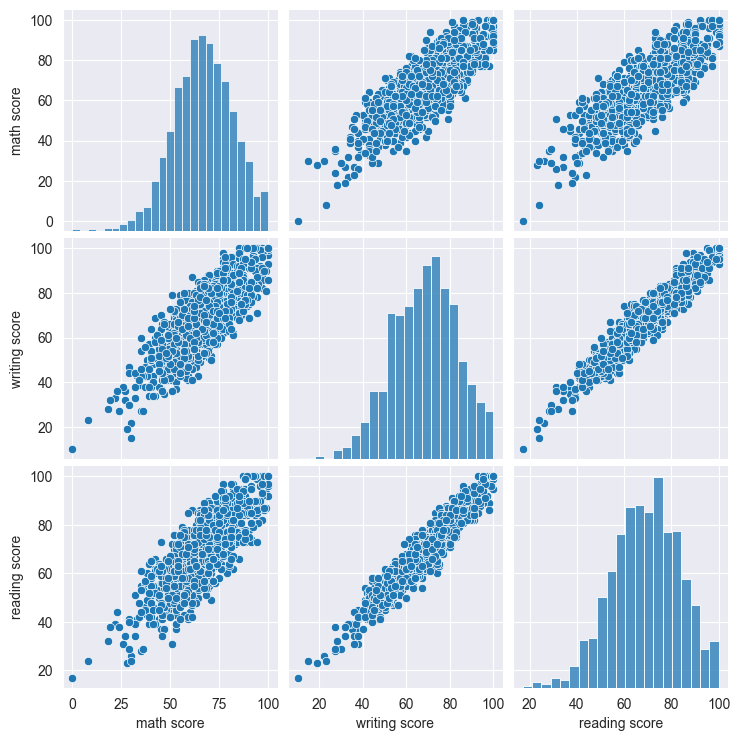

In [21]:
sns.pairplot(df[["math score", "writing score", "reading score"]])

##### Question 1: how many male and female students took the tests?

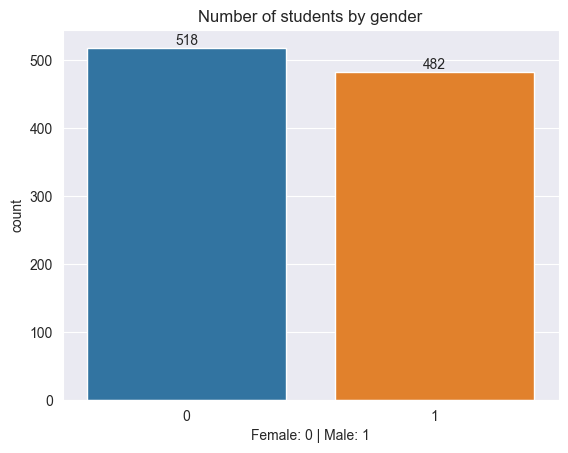

In [22]:
ax = sns.countplot(x="gender",data=df)
ax.bar_label(ax.containers[0])
plt.title("Number of students by gender")
plt.xlabel("Female: 0 | Male: 1")
plt.show()

##### Question 2: what were the scores for each test for both male and female?

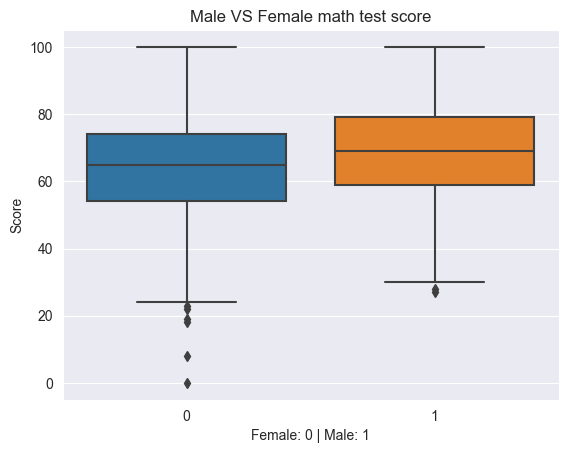

In [23]:
sns.boxplot(x='gender', y='math score', data=df)
plt.title("Male VS Female math test score")
plt.xlabel("Female: 0 | Male: 1")
plt.ylabel("Score")
plt.show()

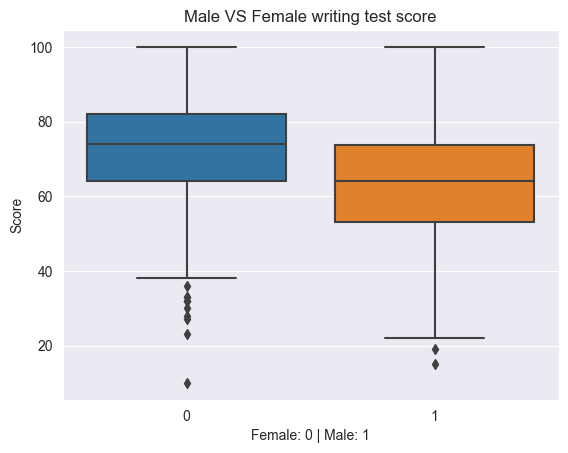

In [24]:
sns.boxplot(x='gender', y='writing score', data=df)
plt.title("Male VS Female writing test score")
plt.xlabel("Female: 0 | Male: 1")
plt.ylabel("Score")
plt.show()

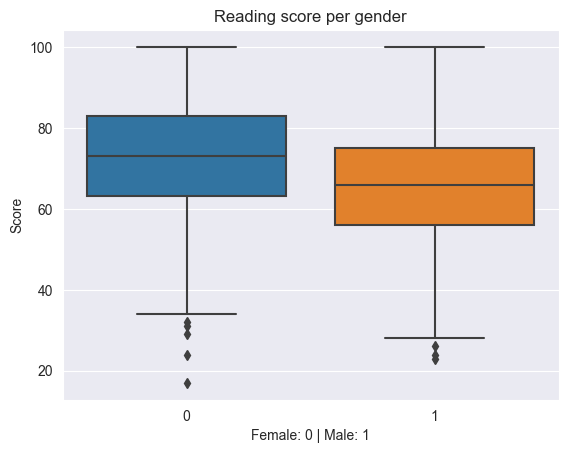

In [25]:
sns.boxplot(x='gender', y='reading score', data=df)
plt.title("Reading score per gender")
plt.xlabel("Female: 0 | Male: 1")
plt.ylabel("Score")
plt.show()

##### Question 3: what percentage of the students belong to each race/ethnicity?

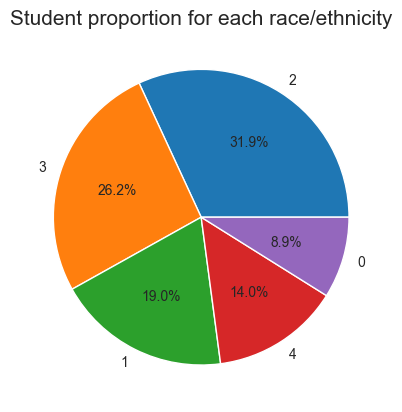

In [26]:
df["race/ethnicity"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Student proportion for each race/ethnicity",fontsize=15)
plt.ylabel("")
plt.show()

##### Question 4: how many students had free/reduced lunch?

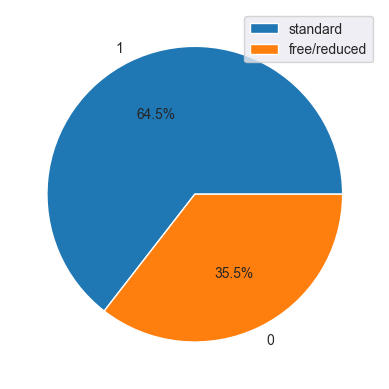

In [27]:
df["lunch"].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.legend(['standard', 'free/reduced'])
plt.show()

##### Question 5: What were the scores of those students who did and did not take the exam preparation course?

In [28]:
# select the columns that have the scores then apply the filter
unprepared = df[["math score","writing score","reading score","total score","final score"]][df["test preparation course"] == 0]
prepared = df[["math score","writing score","reading score","total score","final score"]][df["test preparation course"] == 1]

In [29]:
unprepared.describe()

,math score,writing score,reading score,total score,final score
count,642.000000,642.000000,642.000000,642.000000,642.000000
mean,64.077882,64.504673,66.534268,195.116822,65.038941
std,15.192376,14.999661,14.463885,42.560121,14.186707
min,0.000000,10.000000,17.000000,27.000000,9.000000
25%,54.000000,54.000000,57.000000,166.250000,55.416667
50%,64.000000,65.000000,67.000000,196.000000,65.333333
75%,74.750000,74.000000,76.000000,225.000000,75.000000
max,100.000000,100.000000,100.000000,300.000000,100.000000


In [30]:
prepared.describe()

,math score,writing score,reading score,total score,final score
count,358.000000,358.000000,358.000000,358.000000,358.000000
mean,69.695531,74.418994,73.893855,218.008380,72.669460
std,14.444699,13.375335,13.638384,39.110881,13.036960
min,23.000000,36.000000,37.000000,103.000000,34.333333
25%,60.000000,66.000000,65.000000,195.000000,65.000000
50%,69.000000,76.000000,75.000000,220.500000,73.500000
75%,79.000000,83.000000,84.000000,246.500000,82.166667
max,100.000000,100.000000,100.000000,300.000000,100.000000


<AxesSubplot: ylabel='final score'>

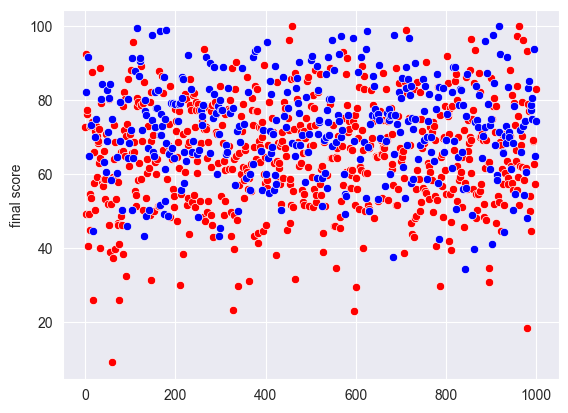

In [31]:
sns.scatterplot(unprepared["final score"], color="red")
sns.scatterplot(prepared["final score"], color="blue")

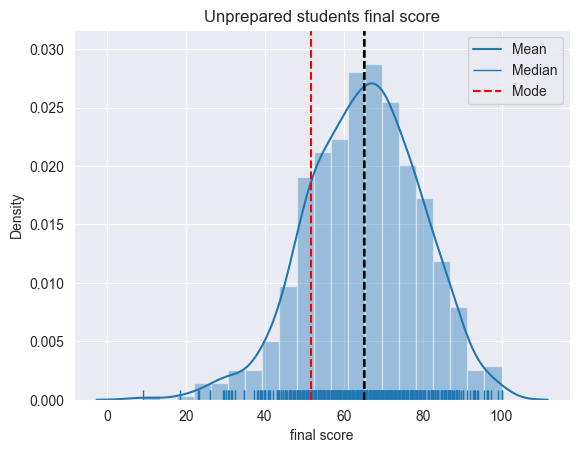

In [32]:
sns.distplot(unprepared["final score"], kde=True, rug=True)
plt.axvline(unprepared["final score"].mode().values[0],color='red', linestyle='--') # adds a vertical line showing the mode
plt.axvline(np.median(unprepared["final score"]),color='green', linestyle='--') # adds a vertical line showing the median
plt.axvline(np.mean(unprepared["final score"]),color='black', linestyle='--') # adds a vertical line showing the mean
plt.legend(labels=["Mean","Median","Mode"])
plt.title("Unprepared students final score")
plt.show()

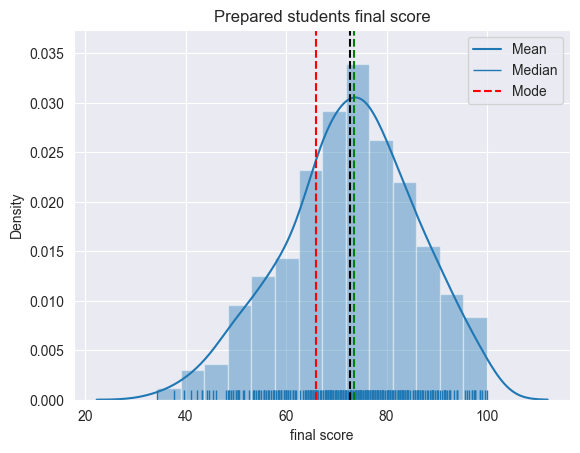

In [33]:
sns.distplot(prepared["final score"], kde=True, rug=True)
plt.axvline(prepared["final score"].mode().values[0],color='red', linestyle='--')
plt.axvline(np.median(prepared["final score"]),color='green', linestyle='--')
plt.axvline(np.mean(prepared["final score"]),color='black', linestyle='--')
plt.legend(labels=["Mean","Median","Mode"])
plt.title("Prepared students final score")
plt.show()

### 3. Modeling

In [34]:
cols = ["total score", "final score"]
X = df.drop(cols, axis=1)
y = df["total score"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
print(f"shape of X_train: {X_train.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_train: (800, 8)
shape of y_train: (800,)
shape of X_test: (200, 8)
shape of y_test: (200,)


In [37]:
# training the model
lr = LinearRegression().fit(X_train, y_train)

In [40]:
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("r2 score: %.2f" % r2)
print("MSE: %.2f" % mse)

r2 score: 1.00
MSE: 0.00
